## Setup for Google Colab




In [ ]:
from io import StringIO
from scipy.io import mmread
from scipy.io import mminfo
from google.colab import drive
drive.mount("/content/drive")
datAddr = "/content/drive/MyDrive/CMSC818J_Data/"
from scipy.sparse import csr_matrix
from scipy import sparse
import numpy as np
import sys
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
baseline_PE2 = pd.read_csv(datAddr + 'Baseline_PE2.csv', header=None)
baseline_PE4 = pd.read_csv(datAddr + 'Baseline_PE4.csv', header=None)
baseline_PE6 = pd.read_csv(datAddr + 'Baseline_PE6.csv', header=None)
baseline_PE8 = pd.read_csv(datAddr + 'Baseline_PE8.csv', header=None)
optimized_PE2 = pd.read_csv(datAddr + 'Optimized_PE2_8fifo.csv', header=None)
optimized_PE4 = pd.read_csv(datAddr + 'Optimized_PE4_8fifo.csv', header=None)
optimized_PE6 = pd.read_csv(datAddr + 'Optimized_PE6_8fifo.csv', header=None)
optimized_PE8 = pd.read_csv(datAddr + 'Optimized_PE8_8fifo.csv', header=None)

In [ ]:
baselineAB_PE2 = pd.read_csv(datAddr + 'BaselineAB_PE2.csv', header=None)
baselineAB_PE4 = pd.read_csv(datAddr + 'BaselineAB_PE4.csv', header=None)
baselineAB_PE6 = pd.read_csv(datAddr + 'BaselineAB_PE6.csv', header=None)
baselineAB_PE8 = pd.read_csv(datAddr + 'BaselineAB_PE8.csv', header=None)

In [ ]:
optimized16_PE2 = pd.read_csv(datAddr + 'Optimized_PE2_16fifo.csv', header=None)
optimized16_PE4 = pd.read_csv(datAddr + 'Optimized_PE4_16fifo.csv', header=None)
optimized16_PE6 = pd.read_csv(datAddr + 'Optimized_PE6_16fifo.csv', header=None)
optimized16_PE8 = pd.read_csv(datAddr + 'Optimized_PE8_16fifo.csv', header=None)

In [ ]:
optimizedAB_PE2 = pd.read_csv(datAddr + 'Optimized_PEAB2_16fifo.csv', header=None)
optimizedAB_PE4 = pd.read_csv(datAddr + 'Optimized_PEAB4_16fifo.csv', header=None)
optimizedAB_PE6 = pd.read_csv(datAddr + 'Optimized_PEAB6_16fifo.csv', header=None)
optimizedAB_PE8 = pd.read_csv(datAddr + 'Optimized_PEAB8_16fifo.csv', header=None)

In [ ]:
plt.rcParams.update({'font.size': 20})

In [ ]:
x_values = ['NAS', 'CIR', 'G27', 'LOC', 'SPA', 'TUM', 'COL', 'DEN']

In [ ]:
combined_comparison_PE_2 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combined_comparison_PE_2.loc[i] = [x_values[i], (baseline_PE2[2][i]/baseline_PE2[5][i] + baseline_PE2[6][i]/baseline_PE2[9][i])/2, 
  (optimized_PE2[2][i]/optimized_PE2[5][i] + optimized_PE2[6][i]/optimized_PE2[9][i])/2]

combined_comparison_PE_2


,Data,B,O
0,NAS,2.163766,24.875132
1,CIR,8.101204,12.149651
2,G27,0.9141,5.912922
3,LOC,74.136705,74.134396
4,SPA,5.152415,6.406269
5,TUM,5.281562,7.43745
6,COL,1.014366,10.65721
7,DEN,6.888301,92.469516


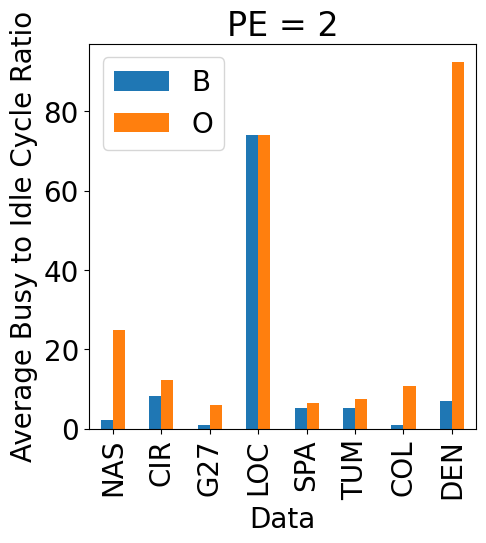

In [ ]:
combined_comparison_PE_2.plot(x='Data', y=["B", "O"], kind="bar",figsize=(5,5))
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 2")
plt.legend(loc='upper left')
# Display the plot
plt.show()

In [ ]:
combined_comparison_PE_4 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combined_comparison_PE_4.loc[i] = [optimized_PE4[0][i], (baseline_PE4[2][i]/baseline_PE4[5][i] + baseline_PE4[6][i]/baseline_PE4[9][i] + baseline_PE4[10][i]/baseline_PE4[13][i] + + baseline_PE4[14][i]/baseline_PE4[17][i])/4, 
  (optimized_PE4[2][i]/optimized_PE4[5][i] + optimized_PE4[6][i]/optimized_PE4[9][i] + optimized_PE4[10][i]/optimized_PE4[13][i] + optimized_PE4[14][i]/optimized_PE4[17][i])/4]

combined_comparison_PE_4['Data'] = x_values
combined_comparison_PE_4

,Data,B,O
0,NAS,1.042235,13.293566
1,CIR,6.230885,10.899755
2,G27,0.391282,4.046867
3,LOC,5.099541,70.941011
4,SPA,3.441555,6.269508
5,TUM,3.436864,7.223476
6,COL,0.420046,9.587423
7,DEN,2.861876,71.425175


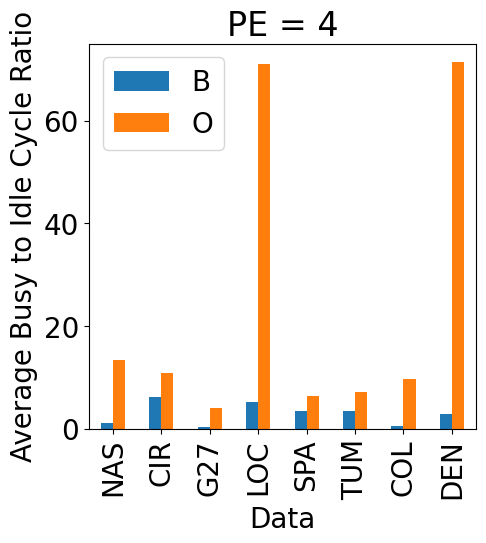

In [ ]:
combined_comparison_PE_4.plot(x="Data", y=["B", "O"], kind="bar",figsize=(5,5))
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 4")
# Display the plot
plt.show()

In [ ]:
combined_comparison_PE_6 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combined_comparison_PE_6.loc[i] = [x_values[i], (baseline_PE6[2][i]/baseline_PE6[5][i] + 
                                                           baseline_PE6[6][i]/baseline_PE6[9][i] + 
                                                           baseline_PE6[10][i]/baseline_PE6[13][i] + 
                                                           baseline_PE6[14][i]/baseline_PE6[17][i] + 
                                                           baseline_PE6[18][i]/baseline_PE6[21][i] + 
                                                           baseline_PE6[22][i]/baseline_PE6[25][i])/6, 
                                                           (optimized_PE6[2][i]/optimized_PE6[5][i] + 
                                                           optimized_PE6[6][i]/optimized_PE6[9][i] + 
                                                           optimized_PE6[10][i]/optimized_PE6[13][i] + 
                                                           optimized_PE6[14][i]/optimized_PE6[17][i] + 
                                                           optimized_PE6[18][i]/optimized_PE6[21][i] + 
                                                           optimized_PE6[22][i]/optimized_PE6[25][i])/6]

combined_comparison_PE_6

,Data,B,O
0,NAS,0.784502,19.331252
1,CIR,5.173582,11.609196
2,G27,0.277566,5.368339
3,LOC,74.132088,74.125163
4,SPA,2.585627,6.263656
5,TUM,2.597178,6.2603
6,COL,0.290879,8.430638
7,DEN,1.970336,88.842798


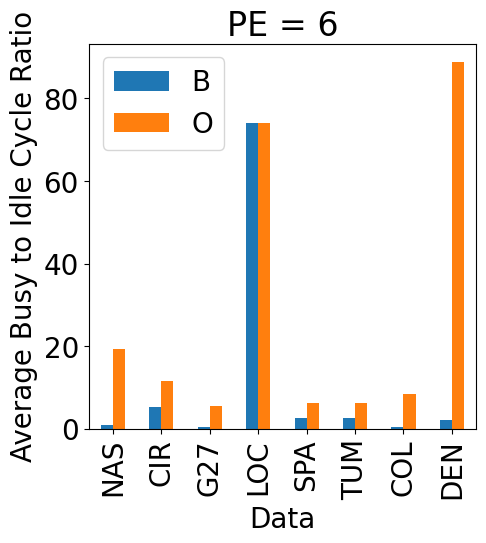

In [ ]:
combined_comparison_PE_6.plot(x="Data", y=["B", "O"], kind="bar",figsize=(5,5))
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 6")
# Display the plot
plt.show()

In [ ]:
combined_comparison_PE_8 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combined_comparison_PE_8.loc[i] = [x_values[i], (baseline_PE8[2][i]/baseline_PE8[5][i] + 
                                                           baseline_PE8[6][i]/baseline_PE8[9][i] + 
                                                           baseline_PE8[10][i]/baseline_PE8[13][i] + 
                                                           baseline_PE8[14][i]/baseline_PE8[17][i] + 
                                                           baseline_PE8[18][i]/baseline_PE8[21][i] + 
                                                           baseline_PE8[22][i]/baseline_PE8[25][i] + 
                                                           baseline_PE8[26][i]/baseline_PE8[29][i] + 
                                                           baseline_PE8[30][i]/baseline_PE8[33][i])/8, 
                                                           (optimized_PE8[2][i]/optimized_PE8[5][i] + 
                                                           optimized_PE8[6][i]/optimized_PE8[9][i] + 
                                                           optimized_PE8[10][i]/optimized_PE8[13][i] + 
                                                           optimized_PE8[14][i]/optimized_PE8[17][i] + 
                                                           optimized_PE8[18][i]/optimized_PE8[21][i] + 
                                                           optimized_PE8[22][i]/optimized_PE8[25][i] + 
                                                           optimized_PE8[26][i]/optimized_PE8[29][i] +
                                                           optimized_PE8[30][i]/optimized_PE8[33][i])/8]

combined_comparison_PE_8

,Data,B,O
0,NAS,0.62605,7.9453
1,CIR,4.750614,9.404818
2,G27,0.227607,2.751005
3,LOC,1.723173,70.93254
4,SPA,2.071086,6.128427
5,TUM,2.049704,6.723859
6,COL,0.231546,7.449156
7,DEN,1.564265,54.686482


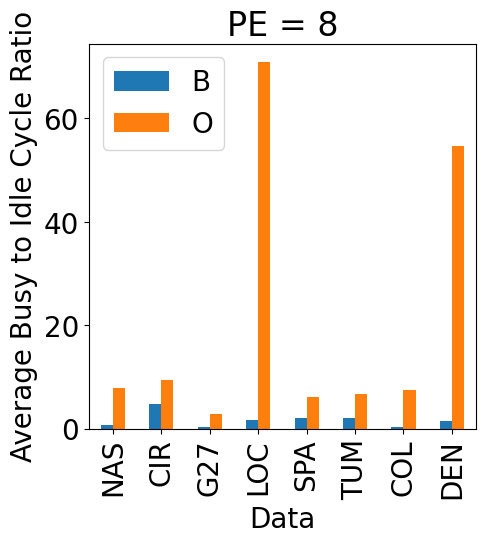

In [ ]:
combined_comparison_PE_8.plot(x="Data", y=["B", "O"], kind="bar",figsize=(5,5))
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 8")
# Display the plot
plt.show()

# Per PE analysis

In [ ]:
individual_comparison_PE_2 = pd.DataFrame(columns = ['Data', 'B PE1', 'B PE2', 'O PE1', 'O PE2'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  individual_comparison_PE_2.loc[i] = [x_values[i], 
                                    baseline_PE2[5][i],
                                    baseline_PE2[9][i],
                                    optimized_PE2[5][i],
                                    optimized_PE2[9][i]]                                                                                                 

individual_comparison_PE_2

,Data,B PE1,B PE2,O PE1,O PE2
0,NAS,1292264,1295552,73380,263062
1,CIR,5171604,5530008,3373228,3778396
2,G27,2756638,2760214,373228,502390
3,LOC,128452,128452,128456,128456
4,SPA,2055534,1851552,1456230,1697317
5,TUM,145885,156715,106397,108178
6,COL,2172316,2232430,204068,215361
7,DEN,3264880,2583412,120561,1210483


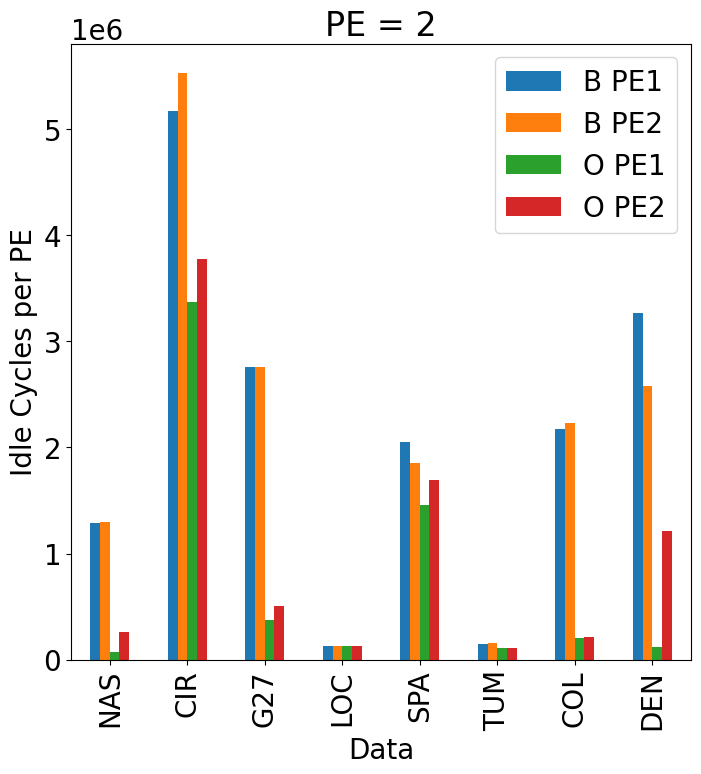

In [ ]:
individual_comparison_PE_2.plot(x="Data", y=["B PE1", "B PE2", "O PE1",
                                            "O PE2"], kind="bar",figsize=(8,8))
plt.ylabel("Idle Cycles per PE")
plt.title("PE = 2")

# Display the plot
plt.show()

In [ ]:
individual_comparison_PE_4 = pd.DataFrame(columns = ['Data', 'B PE1', 'B PE2', 'B PE3', 'B PE4',
                                                     'O PE1', 'O PE2', 'O PE3', 'O PE4'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  individual_comparison_PE_4.loc[i] = [x_values[i], 
                                    baseline_PE4[5][i],
                                    baseline_PE4[9][i],
                                    baseline_PE4[13][i],
                                    baseline_PE4[17][i],
                                    optimized_PE4[5][i],
                                    optimized_PE4[9][i],
                                    optimized_PE4[13][i],
                                    optimized_PE4[17][i]]                                                                                                 

individual_comparison_PE_4

,Data,B PE1,B PE2,B PE3,B PE4,O PE1,O PE2,O PE3,O PE4
0,NAS,1348544,1346882,1336136,1341086,39946,257501,474464,625947
1,CIR,3349209,3603735,3426087,3529965,1694486,1752296,2099648,2699958
2,G27,3215214,3210024,3227370,3236136,205546,315000,410494,526486
3,LOC,936748,936748,930700,930700,70268,70268,64244,64244
4,SPA,1510822,1415206,1510972,1402606,747136,874887,728185,878475
5,TUM,112532,119600,114386,118148,53203,56330,56490,55036
6,COL,2607970,2675170,2680792,2673706,102507,111430,127041,129707
7,DEN,3639828,3305016,3652200,3305544,111001,948964,60114,912909


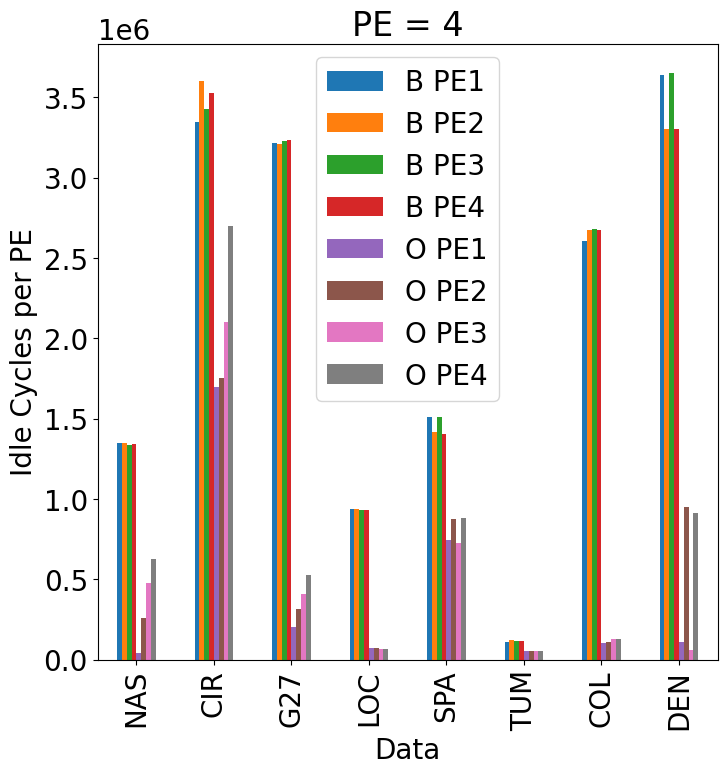

In [ ]:
individual_comparison_PE_4.plot(x="Data", y=["B PE1", "B PE2", "B PE3", "B PE4", "O PE1",
                                            "O PE2", "O PE3", "O PE4"], kind="bar",figsize=(8,8))
plt.ylabel("Idle Cycles per PE")
plt.title("PE = 4")

# Display the plot
plt.show()

In [ ]:
individual_comparison_PE_6 = pd.DataFrame(columns = ['Data', 'B PE1', 'B PE2', 'B PE3', 'B PE4',
                                                     'B PE5', 'B PE6',
                                                     'O PE1', 'O PE2', 'O PE3', 'O PE4', 'O PE5', 'O PE6'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  individual_comparison_PE_6.loc[i] = [x_values[i], 
                                    baseline_PE6[5][i],
                                    baseline_PE6[9][i],
                                    baseline_PE6[13][i],
                                    baseline_PE6[17][i],
                                    baseline_PE6[21][i],
                                    baseline_PE6[25][i],
                                    optimized_PE6[5][i],
                                    optimized_PE6[9][i],
                                    optimized_PE6[13][i],
                                    optimized_PE6[17][i],
                                    optimized_PE6[21][i],
                                    optimized_PE6[25][i]]                                                                                                 

individual_comparison_PE_6

,Data,B PE1,B PE2,B PE3,B PE4,B PE5,B PE6,O PE1,O PE2,O PE3,O PE4,O PE5,O PE6
0,NAS,1192475,1190801,1184165,1182803,1190621,1196945,27031,154916,45024,161926,24907,149158
1,CIR,2691320,2866460,2754764,2826290,2748194,2859932,1126124,1363216,1150205,1353275,1155575,1373533
2,G27,2950426,3073204,3073090,2953774,3074104,3074218,128546,201941,127048,204171,132328,207256
3,LOC,42820,42820,42820,42820,42820,42820,42824,42824,42824,42824,42824,42824
4,SPA,1328620,1263928,1328716,1264006,1328590,1254010,485476,585195,495186,585424,496071,584155
5,TUM,91372,109276,105904,96388,106456,108898,47889,45849,35350,48083,45740,36720
6,COL,2600151,2530527,2545599,2619621,2509179,2564895,74096,161092,69039,80009,158961,72584
7,DEN,3471461,3244451,3473285,3242639,3477239,3253427,40344,605303,43452,603154,40017,606114


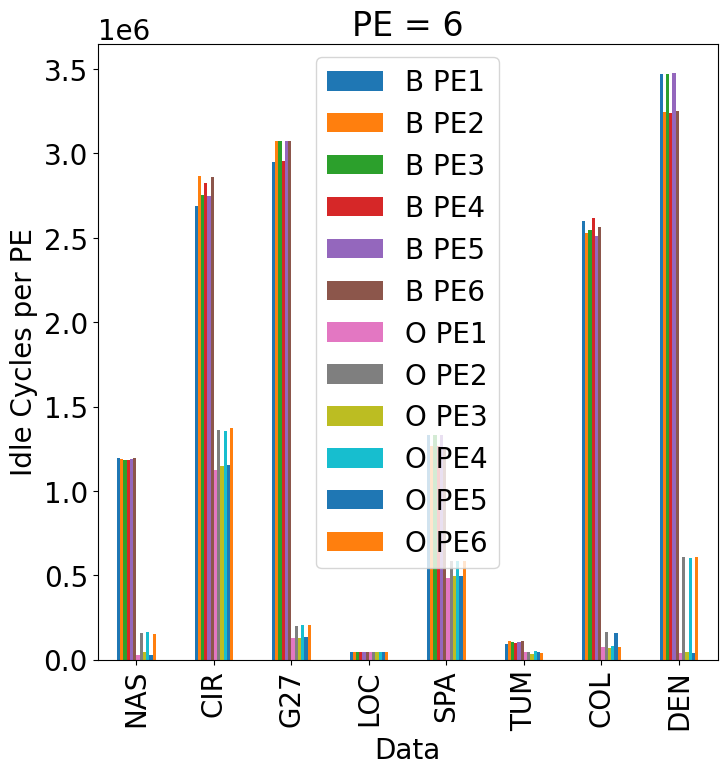

In [ ]:
individual_comparison_PE_6.plot(x="Data", y=['B PE1', 'B PE2', 'B PE3', 'B PE4',
                                                     'B PE5', 'B PE6',
                                                     'O PE1', 'O PE2', 'O PE3', 'O PE4', 'O PE5', 'O PE6'], kind="bar",figsize=(8,8))
plt.ylabel("Idle Cycles per PE")
plt.title("PE = 6")

# Display the plot
plt.show()

# Cycle analysis

In [ ]:
cycle_list_2 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  cycle_list_2.loc[i] = [x_values[i], 
                                    baseline_PE2[1][i],
                                    optimized_PE2[1][i]]                                                                                                 

cycle_list_2

,Data,B,O
0,NAS,4093616,2970176
1,CIR,48644154,46879734
2,G27,5279902,2968782
3,LOC,9651460,9651472
4,SPA,11986248,11613122
5,TUM,949183,905179
6,COL,4435558,2443432
7,DEN,22753348,20496521


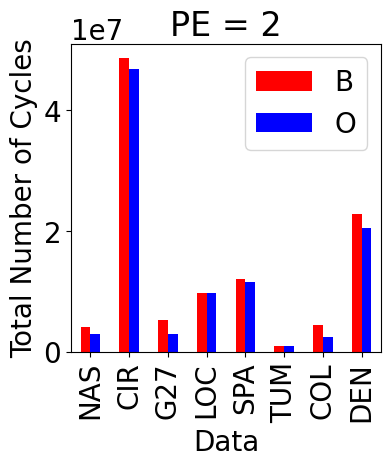

In [ ]:
cycle_list_2.plot(x="Data", y=["B", "O"], kind="bar",figsize=(4,4), color = ["Red", "blue"])
plt.ylabel("Total Number of Cycles")
plt.title("PE = 2")

# Display the plot
plt.show()

In [ ]:
cycle_list_4 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  cycle_list_4.loc[i] = [x_values[i], 
                                    baseline_PE4[1][i],
                                    optimized_PE4[1][i]]                                                                                                 

cycle_list_4

,Data,B,O
0,NAS,2743016,1753698
1,CIR,25123923,23721430
2,G27,4482924,1648800
3,LOC,5695228,4828780
4,SPA,6476254,5825415
5,TUM,515108,454215
6,COL,3776002,1235003
7,DEN,13390248,10423580


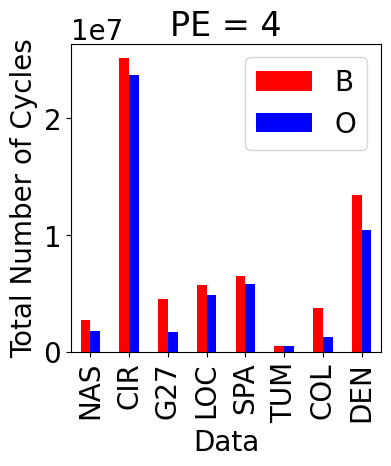

In [ ]:
cycle_list_4.plot(x="Data", y=["B", "O"], figsize=(4,4), kind="bar", color = ["Red", "blue"])
plt.ylabel("Total Number of Cycles")
plt.title("PE = 4")

# Display the plot
plt.show()

In [ ]:
cycle_list_8 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  cycle_list_8.loc[i] = [x_values[i], 
                                    baseline_PE8[1][i],
                                    optimized_PE8[1][i]]                                                                                                 

cycle_list_8

,Data,B,O
0,NAS,1818059,1064752
1,CIR,13106402,12077833
2,G27,3399990,954458
3,LOC,3762364,2414398
4,SPA,3720031,2921938
5,TUM,296828,229222
6,COL,2969967,640346
7,DEN,8130147,5229368


In [ ]:
cycle_list_6 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  cycle_list_6.loc[i] = [x_values[i], 
                                    baseline_PE6[1][i],
                                    optimized_PE6[1][i]]                                                                                                 

cycle_list_6

,Data,B,O
0,NAS,2122871,1028259
1,CIR,17222276,15690010
2,G27,3873628,1013178
3,LOC,3217156,3217168
4,SPA,4638880,3884100
5,TUM,369010,309120
6,COL,3306057,848219
7,DEN,9970151,6933227


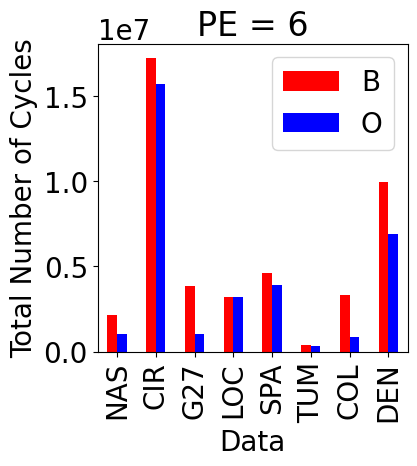

In [ ]:
cycle_list_6.plot(x="Data", y=["B", "O"], kind="bar",figsize=(4,4), color = ["Red", "blue"])
plt.ylabel("Total Number of Cycles")
plt.title("PE = 6")

# Display the plot
plt.show()

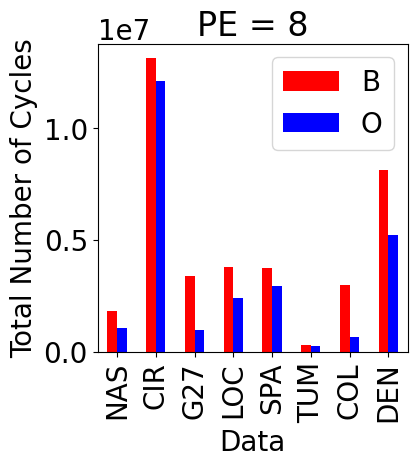

In [ ]:
cycle_list_8.plot(x="Data", y=["B", "O"], kind="bar",figsize=(4,4), color = ["Red", "blue"])
plt.ylabel("Total Number of Cycles")
plt.title("PE = 8")

# Display the plot
plt.show()

# Non-zero assignment analysis 

In [ ]:
nonzeros_comparison_PE_2 = pd.DataFrame(columns = ['Data', 'Baseline PE1', 'Baseline PE2', 'Optimized PE1', 'Optimized PE2'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  nonzeros_comparison_PE_2.loc[i] = [x_values[i], 
                                    baseline_PE2[3][i],
                                    baseline_PE2[7][i],
                                    optimized_PE2[3][i],
                                    optimized_PE2[7][i]]                                                                                                 

nonzeros_comparison_PE_2

,Data,Baseline PE1,Baseline PE2,Optimized PE1,Optimized PE2
0,NAS,42,42,42,36
1,CIR,2571,137,2571,2504
2,G27,37,36,37,33
3,LOC,48,48,48,48
4,SPA,30,1700,1700,33
5,TUM,461,461,461,461
6,COL,237,237,237,237
7,DEN,177,229,229,228


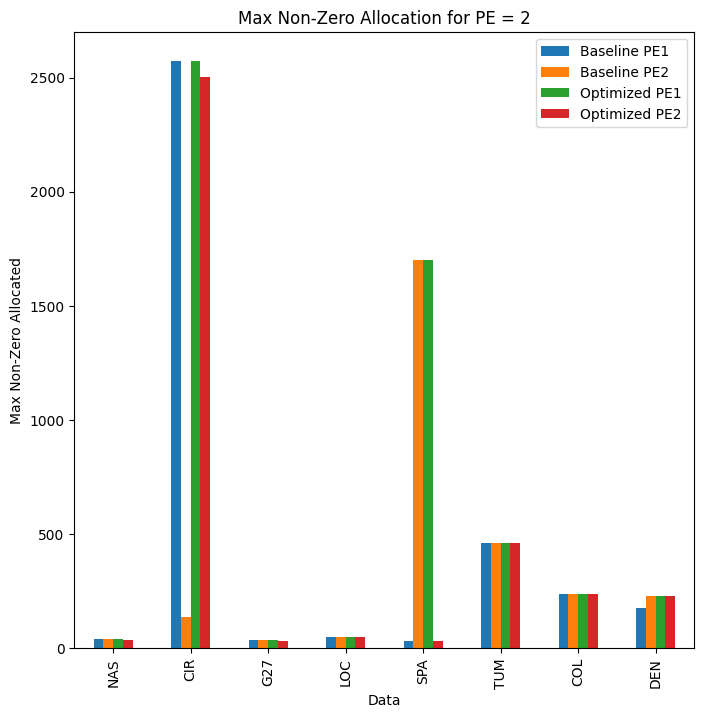

In [ ]:
nonzeros_comparison_PE_2.plot(x="Data", y=["Baseline PE1", "Baseline PE2", "Optimized PE1",
                                            "Optimized PE2"], kind="bar",figsize=(8,8))
plt.ylabel("Max Non-Zero Allocated")
plt.title("Max Non-Zero Allocation for PE = 2")

# Display the plot
plt.show()

In [ ]:
nonzeros_comparison_PE_4 = pd.DataFrame(columns = ['Data', 'Baseline PE1', 'Baseline PE2', 'Baseline PE3', 'Baseline PE4',
                                                     'Optimized PE1', 'Optimized PE2', 'Optimized PE3', 'Optimized PE4'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  nonzeros_comparison_PE_4.loc[i] = [x_values[i], 
                                    baseline_PE4[3][i],
                                    baseline_PE4[7][i],
                                    baseline_PE4[11][i],
                                    baseline_PE4[15][i],
                                    optimized_PE4[3][i],
                                    optimized_PE4[7][i],
                                    optimized_PE4[11][i],
                                    optimized_PE4[15][i]]                                                                                                 

nonzeros_comparison_PE_4

,Data,Baseline PE1,Baseline PE2,Baseline PE3,Baseline PE4,Optimized PE1,Optimized PE2,Optimized PE3,Optimized PE4
0,NAS,42,42,42,42,42,36,33,33
1,CIR,2571,137,2504,137,2571,2504,136,136
2,G27,37,34,33,36,37,33,28,25
3,LOC,48,48,48,48,48,48,48,48
4,SPA,30,1700,30,1700,1700,23,1700,23
5,TUM,461,461,461,461,461,461,461,461
6,COL,237,237,237,237,237,237,237,237
7,DEN,177,229,177,229,229,228,229,228


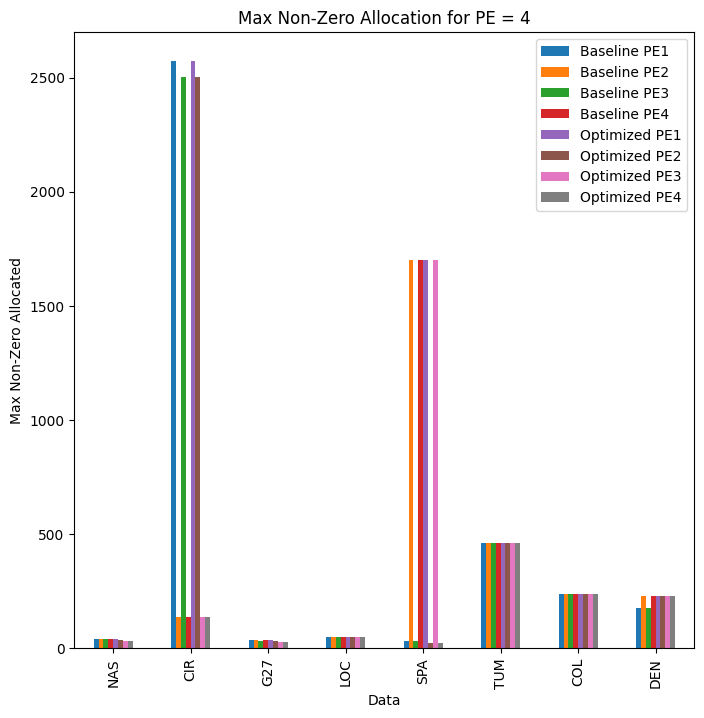

In [ ]:
nonzeros_comparison_PE_4.plot(x="Data", y=["Baseline PE1", "Baseline PE2", "Baseline PE3", "Baseline PE4", "Optimized PE1",
                                            "Optimized PE2", "Optimized PE3", "Optimized PE4"], kind="bar",figsize=(8,8))
plt.ylabel("Max Non-Zero Allocated")
plt.title("Max Non-Zero Allocation for PE = 4")

# Display the plot
plt.show()

In [ ]:
nonzeros_comparison_PE_6 = pd.DataFrame(columns = ['Data', 'Baseline PE1', 'Baseline PE2', 'Baseline PE3', 'Baseline PE4',  'Baseline PE5',  'Baseline PE6',
                                                     'Optimized PE1', 'Optimized PE2', 'Optimized PE3', 'Optimized PE4', 'Optimized PE5', 'Optimized PE6'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])
for i in range(8):

  nonzeros_comparison_PE_6.loc[i] = [x_values[i], 
                                    baseline_PE6[3][i],
                                    baseline_PE6[7][i],
                                    baseline_PE6[11][i],
                                    baseline_PE6[15][i],
                                    baseline_PE6[19][i],
                                    baseline_PE6[23][i],
                                    optimized_PE6[3][i],
                                    optimized_PE6[7][i],
                                    optimized_PE6[11][i],
                                    optimized_PE6[15][i],
                                    optimized_PE6[19][i],
                                    optimized_PE6[23][i]]                                                                                                 

nonzeros_comparison_PE_6

,Data,Baseline PE1,Baseline PE2,Baseline PE3,Baseline PE4,Baseline PE5,Baseline PE6,Optimized PE1,Optimized PE2,Optimized PE3,Optimized PE4,Optimized PE5,Optimized PE6
0,NAS,42,42,42,42,42,42,42,36,42,36,42,36
1,CIR,2571,137,2571,137,2571,137,2571,2504,2571,2504,2571,2504
2,G27,37,36,37,36,37,36,37,33,37,33,37,33
3,LOC,48,48,48,48,48,48,48,48,48,48,48,48
4,SPA,30,1700,30,1700,30,1700,1700,23,1700,23,1700,23
5,TUM,461,94,21,461,94,21,94,21,461,94,21,461
6,COL,233,182,237,233,182,237,233,178,237,233,178,237
7,DEN,177,229,177,229,177,229,229,228,229,228,229,228


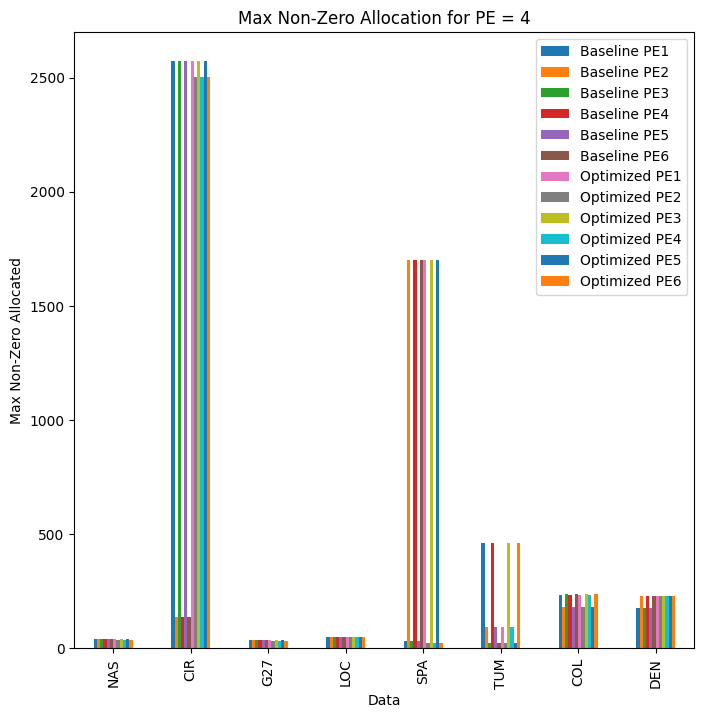

In [ ]:
nonzeros_comparison_PE_6.plot(x="Data", y=['Baseline PE1', 'Baseline PE2', 'Baseline PE3', 'Baseline PE4',  'Baseline PE5',  'Baseline PE6',
                                                     'Optimized PE1', 'Optimized PE2', 'Optimized PE3', 'Optimized PE4', 'Optimized PE5', 'Optimized PE6'], kind="bar",figsize=(8,8))
plt.ylabel("Max Non-Zero Allocated")
plt.title("Max Non-Zero Allocation for PE = 4")

# Display the plot
plt.show()

In [ ]:
average_difference = pd.DataFrame(columns = ['Data', 'PE2', 'PE4', 'PE6', 'PE8'],
        index = [0, 1, 2, 3, 4, 5, 6, 7]) 

for i in range(8):

  average_difference.loc[i] = [x_values[i], 
                                    optimized16_PE2[1][i]/optimized_PE2[1][i],
                                    optimized16_PE4[1][i]/optimized_PE4[1][i],
                                    optimized16_PE6[1][i]/optimized_PE6[1][i],
                                    optimized16_PE8[1][i]/optimized_PE8[1][i]]                                                                                                 

average_difference

,Data,PE2,PE4,PE6,PE8
0,NAS,1.0,0.926672,0.974754,0.883649
1,CIR,1.0,0.998045,0.996863,0.992456
2,G27,1.0,0.949933,0.977728,0.901829
3,LOC,1.0,1.0,1.020711,1.0
4,SPA,1.0,0.998372,0.998277,0.997028
5,TUM,1.0,1.000515,1.000631,0.999476
6,COL,1.0,0.998417,0.970927,0.980495
7,DEN,1.0,0.984517,0.985523,0.983936


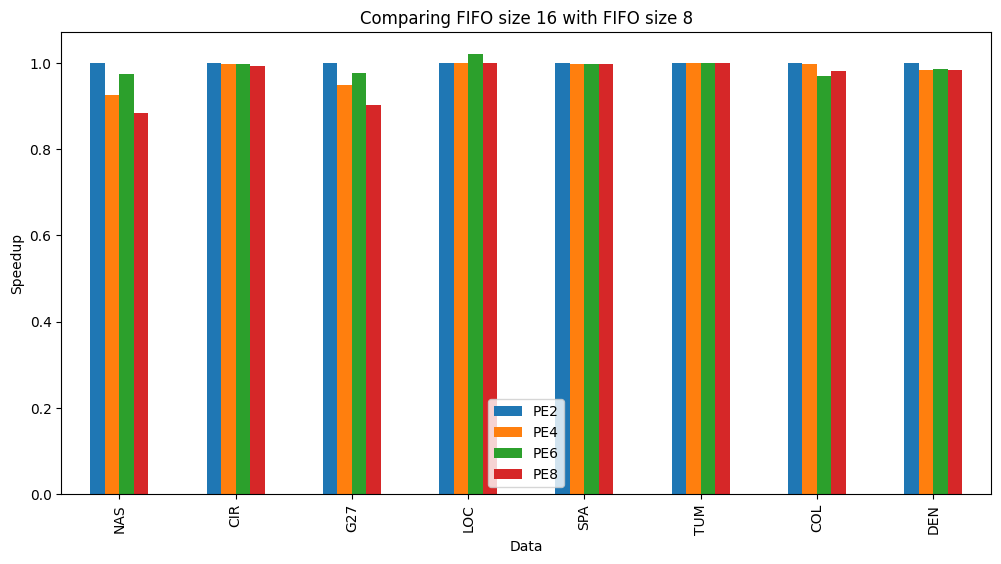

In [ ]:
average_difference.plot(x="Data", y=["PE2", "PE4", "PE6", "PE8"], kind="bar",figsize=(12,6))
plt.ylabel("Speedup")
plt.title("Comparing FIFO size 16 with FIFO size 8")

# Display the plot
plt.show()

In [ ]:
optimized16_PE2

,0,1,2,3,4,5,6,7,8,9
0,nasa1824.mtx,2970176,2896788,42,8,73380,2702628,36,6,263062
1,circuit_1.mtx,46879734,43506498,2571,1,3373228,43080198,2504,1,3778396
2,G27.mtx,2968782,2595546,37,10,373228,2447406,33,7,502390
3,lock2232.mtx,9651472,9523008,48,0,128456,9523008,48,0,128456
4,spaceShuttleEntry_3.mtx,11613122,10156884,1700,4,1456230,9908526,33,2,1697317
5,tumorAntiAngiogenesis_6.mtx,905179,798774,461,2,106397,796992,461,2,108178
6,CollegeMsg.mtx,2443432,2239356,237,0,204068,2227014,237,0,215361
7,dendrimer.mtx,20496521,20375952,229,31,120561,19282452,228,28,1210483


# A x B multiplication analysis


In [ ]:
combinedAB_comparison_PE_2 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combinedAB_comparison_PE_2.loc[i] = [x_values[i], (baselineAB_PE2[2][i]/baselineAB_PE2[5][i] + baselineAB_PE2[6][i]/baselineAB_PE2[9][i])/2, 
  (optimizedAB_PE2[2][i]/optimizedAB_PE2[5][i] + optimizedAB_PE2[6][i]/optimizedAB_PE2[9][i])/2]

combinedAB_comparison_PE_2

,Data,B,O
0,NAS,3.792792,12.268942
1,CIR,2.622549,13.663487
2,G27,2.047357,9.964226
3,LOC,26.333315,26.333233
4,SPA,3.456056,9.992785
5,TUM,2.808556,14.710748
6,COL,1.164639,14.974783
7,DEN,6.608022,37.628237


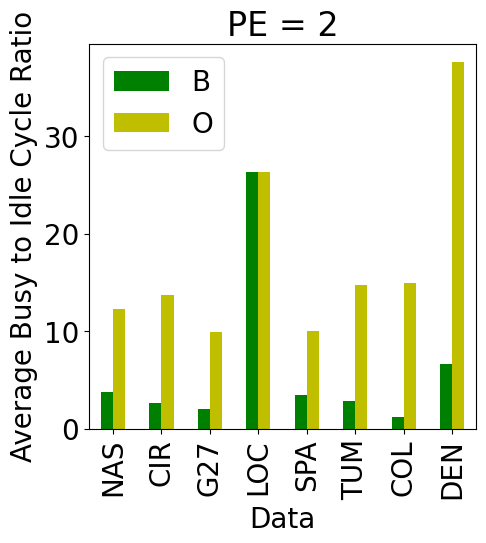

In [ ]:
combinedAB_comparison_PE_2.plot(x='Data', y=["B", "O"], kind="bar",figsize=(5,5), color = ['g', 'y'])
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 2")
# Display the plot
plt.show()

In [ ]:
combinedAB_comparison_PE_4 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combinedAB_comparison_PE_4.loc[i] = [x_values[i], (baselineAB_PE4[2][i]/baselineAB_PE4[5][i] + baselineAB_PE4[6][i]/baselineAB_PE4[9][i] + baselineAB_PE4[10][i]/baselineAB_PE4[13][i] + baselineAB_PE4[14][i]/baselineAB_PE4[17][i])/4, 
  (optimizedAB_PE4[2][i]/optimizedAB_PE4[5][i] + optimizedAB_PE4[6][i]/optimizedAB_PE4[9][i] + optimizedAB_PE4[10][i]/optimizedAB_PE4[13][i] + optimizedAB_PE4[14][i]/optimizedAB_PE4[17][i])/4]

combinedAB_comparison_PE_4

,Data,B,O
0,NAS,2.10347,7.827304
1,CIR,1.447925,9.073906
2,G27,1.085031,6.754869
3,LOC,9.229956,24.855855
4,SPA,1.622203,9.420931
5,TUM,1.220965,13.941919
6,COL,0.499061,13.068155
7,DEN,3.135495,30.284204


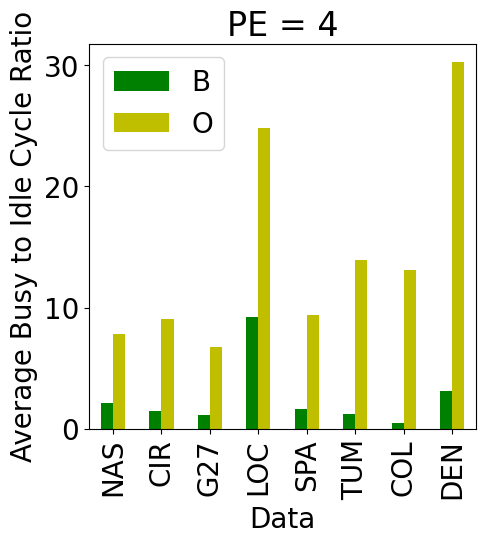

In [ ]:
combinedAB_comparison_PE_4.plot(x='Data', y=["B", "O"], kind="bar",figsize=(5,5), color = ['g', 'y'])
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 4")
# Display the plot
plt.show()

In [ ]:
combinedAB_comparison_PE_6 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combinedAB_comparison_PE_6.loc[i] = [x_values[i], (baselineAB_PE6[2][i]/baselineAB_PE6[5][i] + 
                                                           baselineAB_PE6[6][i]/baselineAB_PE6[9][i] + 
                                                           baselineAB_PE6[10][i]/baselineAB_PE6[13][i] + 
                                                           baselineAB_PE6[14][i]/baselineAB_PE6[17][i] + 
                                                           baselineAB_PE6[18][i]/baselineAB_PE6[21][i] + 
                                                           baselineAB_PE6[22][i]/baselineAB_PE6[25][i])/6, 
                                                           (optimizedAB_PE6[2][i]/optimizedAB_PE6[5][i] + 
                                                           optimizedAB_PE6[6][i]/optimizedAB_PE6[9][i] + 
                                                           optimizedAB_PE6[10][i]/optimizedAB_PE6[13][i] + 
                                                           optimizedAB_PE6[14][i]/optimizedAB_PE6[17][i] + 
                                                           optimizedAB_PE6[18][i]/optimizedAB_PE6[21][i] + 
                                                           optimizedAB_PE6[22][i]/optimizedAB_PE6[25][i])/6]

combinedAB_comparison_PE_6

,Data,B,O
0,NAS,1.66146,10.542072
1,CIR,0.818626,13.193311
2,G27,0.854099,9.834885
3,LOC,26.333151,26.332904
4,SPA,1.155678,9.765546
5,TUM,0.854994,7.212877
6,COL,0.354134,10.964425
7,DEN,2.306822,37.26056


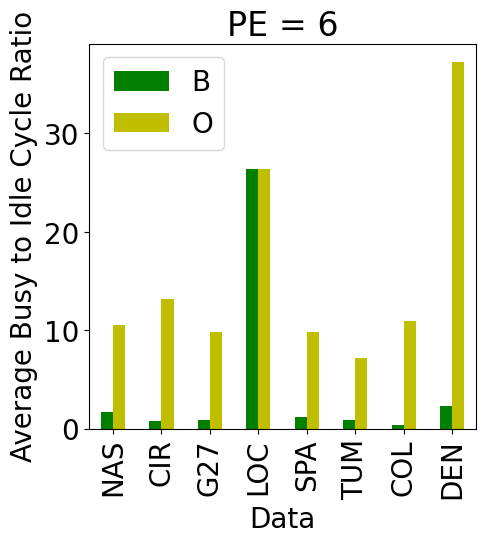

In [ ]:
combinedAB_comparison_PE_6.plot(x="Data", y=["B", "O"], kind="bar",figsize=(5,5), color = ['g', 'y'])
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 6")
# Display the plot
plt.show()

In [ ]:
combinedAB_comparison_PE_8 = pd.DataFrame(columns = ['Data', 'B', 'O'],
        index = [0, 1, 2, 3, 4, 5, 6, 7])

for i in range(8):
  combinedAB_comparison_PE_8.loc[i] = [x_values[i], (baselineAB_PE8[2][i]/baselineAB_PE8[5][i] + 
                                                           baselineAB_PE8[6][i]/baselineAB_PE8[9][i] + 
                                                           baselineAB_PE8[10][i]/baselineAB_PE8[13][i] + 
                                                           baselineAB_PE8[14][i]/baselineAB_PE8[17][i] + 
                                                           baselineAB_PE8[18][i]/baselineAB_PE8[21][i] + 
                                                           baselineAB_PE8[22][i]/baselineAB_PE8[25][i] + 
                                                           baselineAB_PE8[26][i]/baselineAB_PE8[29][i] + 
                                                           baselineAB_PE8[30][i]/baselineAB_PE8[33][i])/8, 
                                                           (optimizedAB_PE8[2][i]/optimizedAB_PE8[5][i] + 
                                                           optimizedAB_PE8[6][i]/optimizedAB_PE8[9][i] + 
                                                           optimizedAB_PE8[10][i]/optimizedAB_PE8[13][i] + 
                                                           optimizedAB_PE8[14][i]/optimizedAB_PE8[17][i] + 
                                                           optimizedAB_PE8[18][i]/optimizedAB_PE8[21][i] + 
                                                           optimizedAB_PE8[22][i]/optimizedAB_PE8[25][i] + 
                                                           optimizedAB_PE8[26][i]/optimizedAB_PE8[29][i] +
                                                           optimizedAB_PE8[30][i]/optimizedAB_PE8[33][i])/8]

combinedAB_comparison_PE_8

,Data,B,O
0,NAS,1.384624,5.129342
1,CIR,0.792173,5.351199
2,G27,0.750133,4.200445
3,LOC,3.971511,24.171702
4,SPA,0.92907,8.978414
5,TUM,0.642267,13.292836
6,COL,0.286509,11.24569
7,DEN,1.936489,25.63108


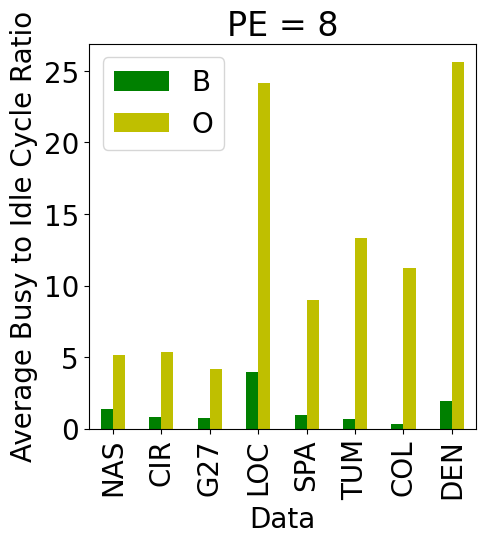

In [ ]:
combinedAB_comparison_PE_8.plot(x="Data", y=["B", "O"], kind="bar",figsize=(5,5), color = ['g', 'y'])
plt.ylabel("Average Busy to Idle Cycle Ratio")
plt.title("PE = 8")
# Display the plot
plt.show()